# INTERN @ ACADEMY OF SKILL DEVELOPMENT
## NAME   : BABU VIJAYA RAGHAVAN M
## DOMAIN  : AI MACHINE LEARNING USING PYTHON
## BATCH    : SVT-22-MLP-B4-23RDJULY
## PROJECT TOPIC : Stock Price Prediction

# Step 1 -  Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

# Step 2 - Getting Visualising the Data

In [34]:
df = pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


# Step 3 – Print the DataFrame Shape and Check for Null Values.

In [37]:
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (9083, 6)
Null Value Present:  False


# Step 4 – Plotting the True Adjusted Close Value

<AxesSubplot:xlabel='Date'>

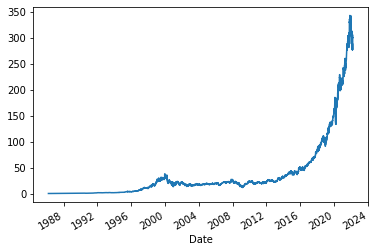

In [39]:
df['Adj Close'].plot()

# Step 5 – Setting the Target Variable and Selecting the Features

In [40]:
#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

# Step 6 – Scaling

In [41]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


# Step 7 – Splitting to a Training Set and Test Set.

In [42]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

# Step 8 – Processing the Data For LSTM

In [43]:
#Process the data for LSTM
trainX =np.array(X_train)

testX =np.array(X_test)

X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

# Step 9 – Building the LSTM Model

In [55]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Step 10 – Training the Model

In [56]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 [==============================] - 4s 2ms/step - loss: 22.8650
Epoch 2/100
1033/1033 [==============================] - 2s 2ms/step - loss: 162.8909
Epoch 3/100
1033/1033 [==============================] - 2s 2ms/step - loss: 70.1808
Epoch 4/100
1033/1033 [==============================] - 2s 2ms/step - loss: 17.4333
Epoch 5/100
1033/1033 [==============================] - 2s 2ms/step - loss: 3.3237
Epoch 6/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.2537
Epoch 7/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.8036
Epoch 8/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.6205
Epoch 9/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.5408
Epoch 10/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.5120
Epoch 11/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.5040
Epoch 12/100
1033/1033 [==============================] - 2s 2ms/step

1033/1033 [==============================] - 2s 2ms/step - loss: 0.6559
Epoch 98/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.6567
Epoch 99/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.6574
Epoch 100/100
1033/1033 [==============================] - 2s 2ms/step - loss: 0.6581


# Step 11 – LSTM Prediction

In [57]:
#LSTM Prediction

y_pred= lstm.predict(X_test)

# Step 12 – Actual vs Predicted Adj Close Value – LSTM

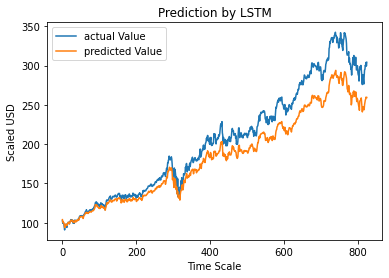

In [58]:
#True vs Predicted Adj Close Value – LSTM
plt.plot(y_test, label='actual Value')
plt.plot(y_pred, label='predicted Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()